In [98]:
from skimage import io, morphology, filters, segmentation
from skimage.color import rgb2gray, rgba2rgb
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from src.preprocessing import process_video,get_video
from skimage.color import label2rgb


# colors = cm.Blues(np.linspace(0.2, 1, 3))

In [99]:
label_video = get_video('images/cheese_gel.avi', threshold=None, skip_size=239)
# im = io.imread("images/last_pic_zoomed.png")

In [100]:
thr1 = 0.1
thr2 = 0.6

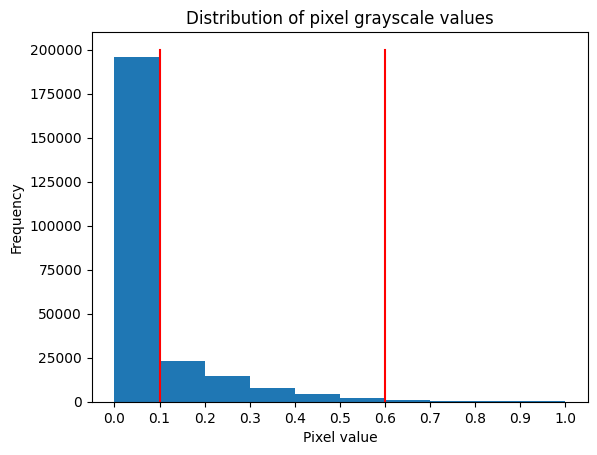

In [101]:
im = label_video[1] [200:700,200:700]
# plt.axis("off")
# plt.tight_layout()
# plt.imshow(im)
n, bins, patches = plt.hist(im.flatten(), bins=10)
plt.xticks(bins)
plt.plot([thr1, thr1], [0, 200000], 'r-')
plt.plot([thr2, thr2], [0, 200000], 'r-')
plt.xlabel('Pixel value')
plt.ylabel('Frequency')
plt.title('Distribution of pixel grayscale values')
plt.show()

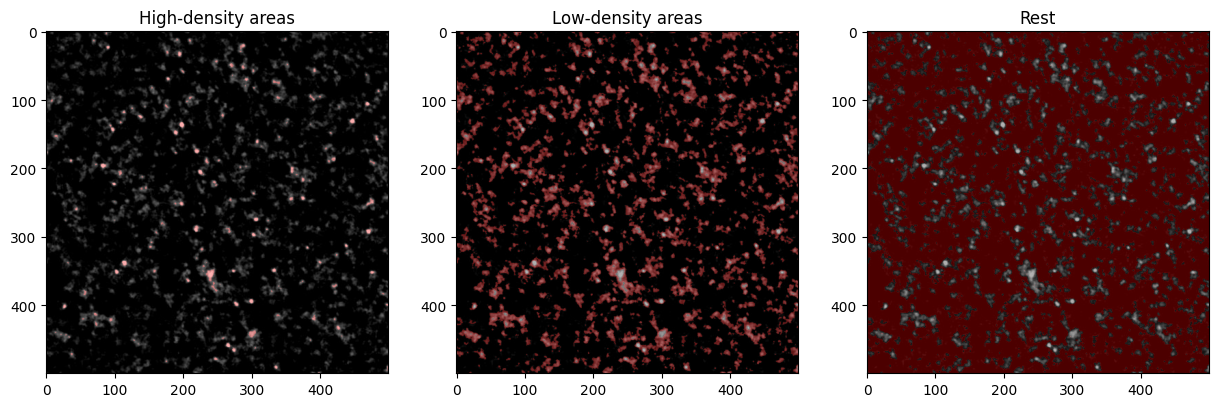

In [102]:
hi_dens = im > thr2
low_dens = np.logical_and(im > thr1, im < thr2)
rest = np.logical_not(np.logical_or(hi_dens,low_dens))

image_label_overlay_hi = label2rgb(hi_dens, image=im)
image_label_overlay_low = label2rgb(low_dens, image=im)
image_label_overlay_rest = label2rgb(rest, image=im)

fig, ax = plt.subplots(1, 3, figsize=(15,5)) # figsize sets size in inches
ax[0].imshow(image_label_overlay_hi)
ax[0].set_title('High-density areas')
ax[1].imshow(image_label_overlay_low,cmap='gray')
ax[1].set_title('Low-density areas')
ax[2].imshow(image_label_overlay_rest,cmap='gray')
ax[2].set_title('Rest')
plt.show()

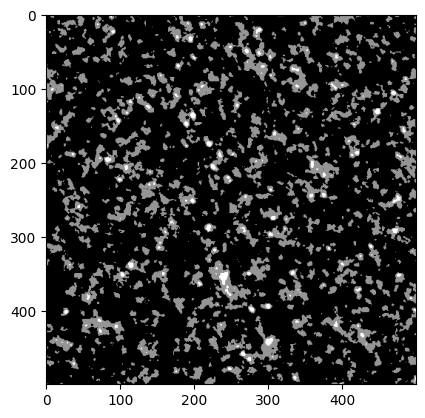

In [103]:
plt.rcParams['image.cmap'] = 'Greys'
def a (x):
    if x > thr2:
        return 0
    if x < thr1:
        return 2
    else:
        return 1
    
v = np.vectorize(a)
im_thresh = v(im)

plt.imshow((im_thresh))
plt.show()